In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.options.mode.chained_assignment = None  # default='warn'
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
titanic_file_path = '/kaggle/input/titanic/train.csv'
titanic_data = pd.read_csv(titanic_file_path)
print(titanic_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [3]:
titanic_data = titanic_data.drop(['Cabin'],axis = 1)

In [4]:
titanic_data.info()
# total = 891
# age = 714 (177 missing)
# cabin = missing
# embarked = 2 missing 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [5]:
titanic_data['Age'] = titanic_data['Age'].interpolate()
titanic_data = titanic_data.dropna()
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [6]:
dummy = []
cols = ['Pclass', 'Sex', 'Embarked']
for i in cols:
    dummy.append(pd.get_dummies(titanic_data[i]))

titanic_dummy = pd.concat(dummy, axis=1)
titanic_data = pd.concat((titanic_data,titanic_dummy), axis=1)

In [7]:
titanic_data = titanic_data.drop(cols,axis = 1)

In [8]:
titanic_data.columns

Index(['PassengerId',    'Survived',        'Name',         'Age',
             'SibSp',       'Parch',      'Ticket',        'Fare',
                   1,             2,             3,      'female',
              'male',           'C',           'Q',           'S'],
      dtype='object')

In [9]:
y = titanic_data.Survived
X = titanic_data[['PassengerId','Age','SibSp','Parch','Fare',1,2,3,'female','male','C','Q','S']]
# X = titanic_data[[ 'Age', 'SibSp','Parch', 'Fare']]
print(X.head)

<bound method NDFrame.head of      PassengerId   Age  SibSp  Parch     Fare  1  2  3  female  male  C  Q  S
0              1  22.0      1      0   7.2500  0  0  1       0     1  0  0  1
1              2  38.0      1      0  71.2833  1  0  0       1     0  1  0  0
2              3  26.0      0      0   7.9250  0  0  1       1     0  0  0  1
3              4  35.0      1      0  53.1000  1  0  0       1     0  0  0  1
4              5  35.0      0      0   8.0500  0  0  1       0     1  0  0  1
..           ...   ...    ...    ...      ... .. .. ..     ...   ... .. .. ..
886          887  27.0      0      0  13.0000  0  1  0       0     1  0  0  1
887          888  19.0      0      0  30.0000  1  0  0       1     0  0  0  1
888          889  22.5      1      2  23.4500  0  0  1       1     0  0  0  1
889          890  26.0      0      0  30.0000  1  0  0       0     1  1  0  0
890          891  32.0      0      0   7.7500  0  0  1       0     1  0  1  0

[889 rows x 13 columns]>


In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Age          889 non-null    float64
 2   SibSp        889 non-null    int64  
 3   Parch        889 non-null    int64  
 4   Fare         889 non-null    float64
 5   1            889 non-null    uint8  
 6   2            889 non-null    uint8  
 7   3            889 non-null    uint8  
 8   female       889 non-null    uint8  
 9   male         889 non-null    uint8  
 10  C            889 non-null    uint8  
 11  Q            889 non-null    uint8  
 12  S            889 non-null    uint8  
dtypes: float64(2), int64(3), uint8(8)
memory usage: 48.6 KB


In [11]:
train_X,val_X,train_y,val_y = train_test_split(X,y,random_state = 1)

In [12]:
rf_model = RandomForestClassifier(random_state = 1)
# rf_model = DecisionTreeClassifier(random_state = 1)
rf_model.fit(train_X.values,train_y.values)
prediction = rf_model.predict(val_X.values)

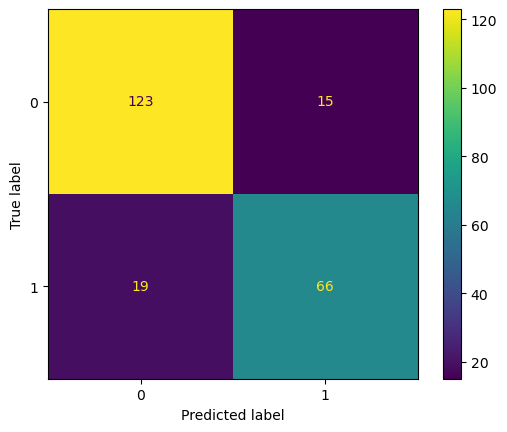

In [13]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score
import matplotlib.pyplot as plt
titanic_confusion_matrix = confusion_matrix(val_y,prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=titanic_confusion_matrix)
disp.plot()
plt.show()

In [14]:
accuracy = accuracy_score(val_y,prediction)
print(accuracy)

0.8475336322869955
